In [67]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def get_centroid(phi, X, Y):
    """Compute the centroid of the region phi <= 0."""
    mask = (phi <= 0)
    if not mask.any():
        return None
    # Select the physical coordinates of all solid cells
    Xs = X[mask]
    Ys = Y[mask]
    return Xs.mean(), Ys.mean()

def get_area(phi, dx, dy):
    """Compute the area of the region phi <= 0."""
    mask = (phi <= 0)
    return np.sum(mask)*dx*dy  # Count the number of cells where phi <= 0

In [69]:
def compute_centrods(frames_dir):
    # Assume all your phi fields have the same shape:
    sample = h5py.File(os.path.join(frames_dir, sorted(os.listdir(frames_dir))[0]), 'r')
    phi0 = sample['phi'][:]
    sample.close()

    Nx, Ny = phi0.shape
    x = np.linspace(0, 1, Ny)
    y = np.linspace(0, 1, Nx)
    dx = x[1] - x[0]  # Assuming uniform grid spacing
    dy = y[1] - y[0]  # Assuming uniform grid spacing
    X, Y = np.meshgrid(x, y)

    
    areas = []
    centroids = []
    for filename in sorted(os.listdir(frames_dir)):
        if not filename.endswith('.h5'):
            continue
        with h5py.File(os.path.join(frames_dir, filename), 'r') as f:
            phi = f['phi'][:]
        c = get_centroid(phi, X, Y)
        if c is not None:
            centroids.append(c)       
        area = get_area(phi, dx, dy)
        areas.append(area)
        
    return centroids, areas

In [70]:

# frames_dir_2 = 'frames_256x256_top_notch_kappa_10'
# centroids_2, areas_2 = compute_centrods("../"+frames_dir_2)

In [71]:
# frames_dir_1 = 'frames_128x128_fixed_stress_kappa_0_wt_4'
# centroids_1, areas_1 = compute_centrods("../"+frames_dir_1)

In [72]:
# frames_dir_3 = 'frames_128x128_top_notch_kappa_5'
# centroids_3, areas_3 = compute_centrods("../"+frames_dir_3)

In [73]:
frames_dir_4 = 'outputs/output_lid_driven_soft_disc_2'
centroids_4, areas_4 = compute_centrods("../"+frames_dir_4)

In [74]:
# centroids_arr_1 = np.array(centroids_1)
# centroids_arr_2 = np.array(centroids_2)
# centroids_arr_3 = np.array(centroids_3)
centroids_arr_4 = np.array(centroids_4)

# print(f"Nume of centroids for case 1: {len(centroids_arr_1)}")
# print(f"Nume of centroids for case 2: {len(centroids_arr_2)}")
# print(f"Nume of centroids for case 3: {len(centroids_arr_3)}")
print(f"Nume of centroids for case 4: {len(centroids_arr_4)}")

Nume of centroids for case 4: 537


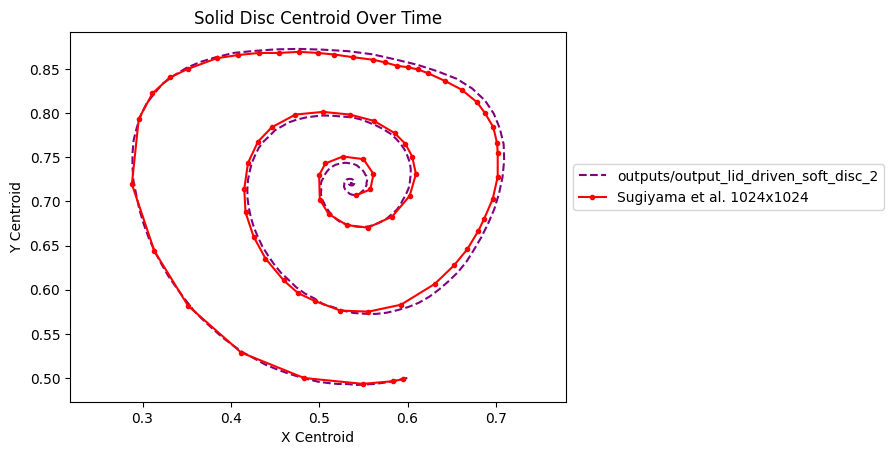

In [75]:

# Plot every 5th centroid to reduce point frequency
# x_1 = centroids_arr_1[::10, 0]
# y_1 = centroids_arr_1[::10, 1]

# x_2 = centroids_arr_2[::10, 0]
# y_2 = centroids_arr_2[::10, 1]

# x_3 = centroids_arr_3[::10, 0]
# y_3 = centroids_arr_3[::10, 1]

x_4 = centroids_arr_4[::1, 0]
y_4 = centroids_arr_4[::1, 1]

# plt.plot(x_1, y_1, '--', markersize=3, color='blue', label=frames_dir_1)
# plt.plot(x_2, y_2, '--', markersize=3, color='green', label=frames_dir_2)
# plt.plot(x_3, y_3, '--', markersize=3, color='orange', label=frames_dir_3)
plt.plot(x_4, y_4, '--', markersize=3, color='purple', label=frames_dir_4)

# open csv file to get benchmark data
benchmark_file = '../data/Sugiyama_1024x1024.csv'
if os.path.exists(benchmark_file):
    benchmark_data = np.loadtxt(benchmark_file, delimiter=',', skiprows=0)
    plt.plot(benchmark_data[:, 0], benchmark_data[:, 1], 'o-', markersize=3, color='red', label='Sugiyama et al. 1024x1024')
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))

plt.xlabel('X Centroid')
plt.ylabel('Y Centroid')
plt.title('Solid Disc Centroid Over Time')
# plt.grid()
plt.axis('equal')
plt.show()



In [76]:

def compute_area_err(areas):
    areas = np.array(areas)
    areas = (areas[0] - areas) / areas[0] * 100  # Normalize to the first area
    return areas


# Plot the area over time
plt.figure(figsize=(10, 5))
plt.plot(compute_area_err(areas_1))
plt.plot(compute_area_err(areas_2))
plt.plot(compute_area_err(areas_3))
plt.plot(compute_area_err(areas_4))

plt.legend([frames_dir_1, frames_dir_2, frames_dir_3, frames_dir_4], loc='lower left')


plt.xlabel('Time Step')
plt.ylabel('Area of Solid Region (%)')
plt.title('Area of Solid Region Over Time')
plt.grid()
plt.show()


NameError: name 'areas_1' is not defined

<Figure size 1000x500 with 0 Axes>